In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df1=pd.read_csv("/content/titanic.csv")
display(df1.shape)
df1.head()

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1["Survived"].replace({0:"died", 1:"saved"},inplace=True)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,saved,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,saved,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,saved,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df1=df1.drop(['PassengerId','Ticket'],axis=1)
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,saved,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,saved,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,saved,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,died,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [7]:
df1=df1.drop(labels=[1,2,3],axis=0)
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
4,died,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,died,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,died,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,died,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S


In [8]:
df1.columns.tolist()

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
#print('method 1:')
#df1.isnull().sum()
print('method')
df1.isnull().sum()

method


,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,686
Embarked,2


In [10]:
var1=[col for col in df1.columns if df1[col].isnull().sum()!=0]
print(df1[var1].isnull().sum())

Age         177
Cabin       686
Embarked      2
dtype: int64


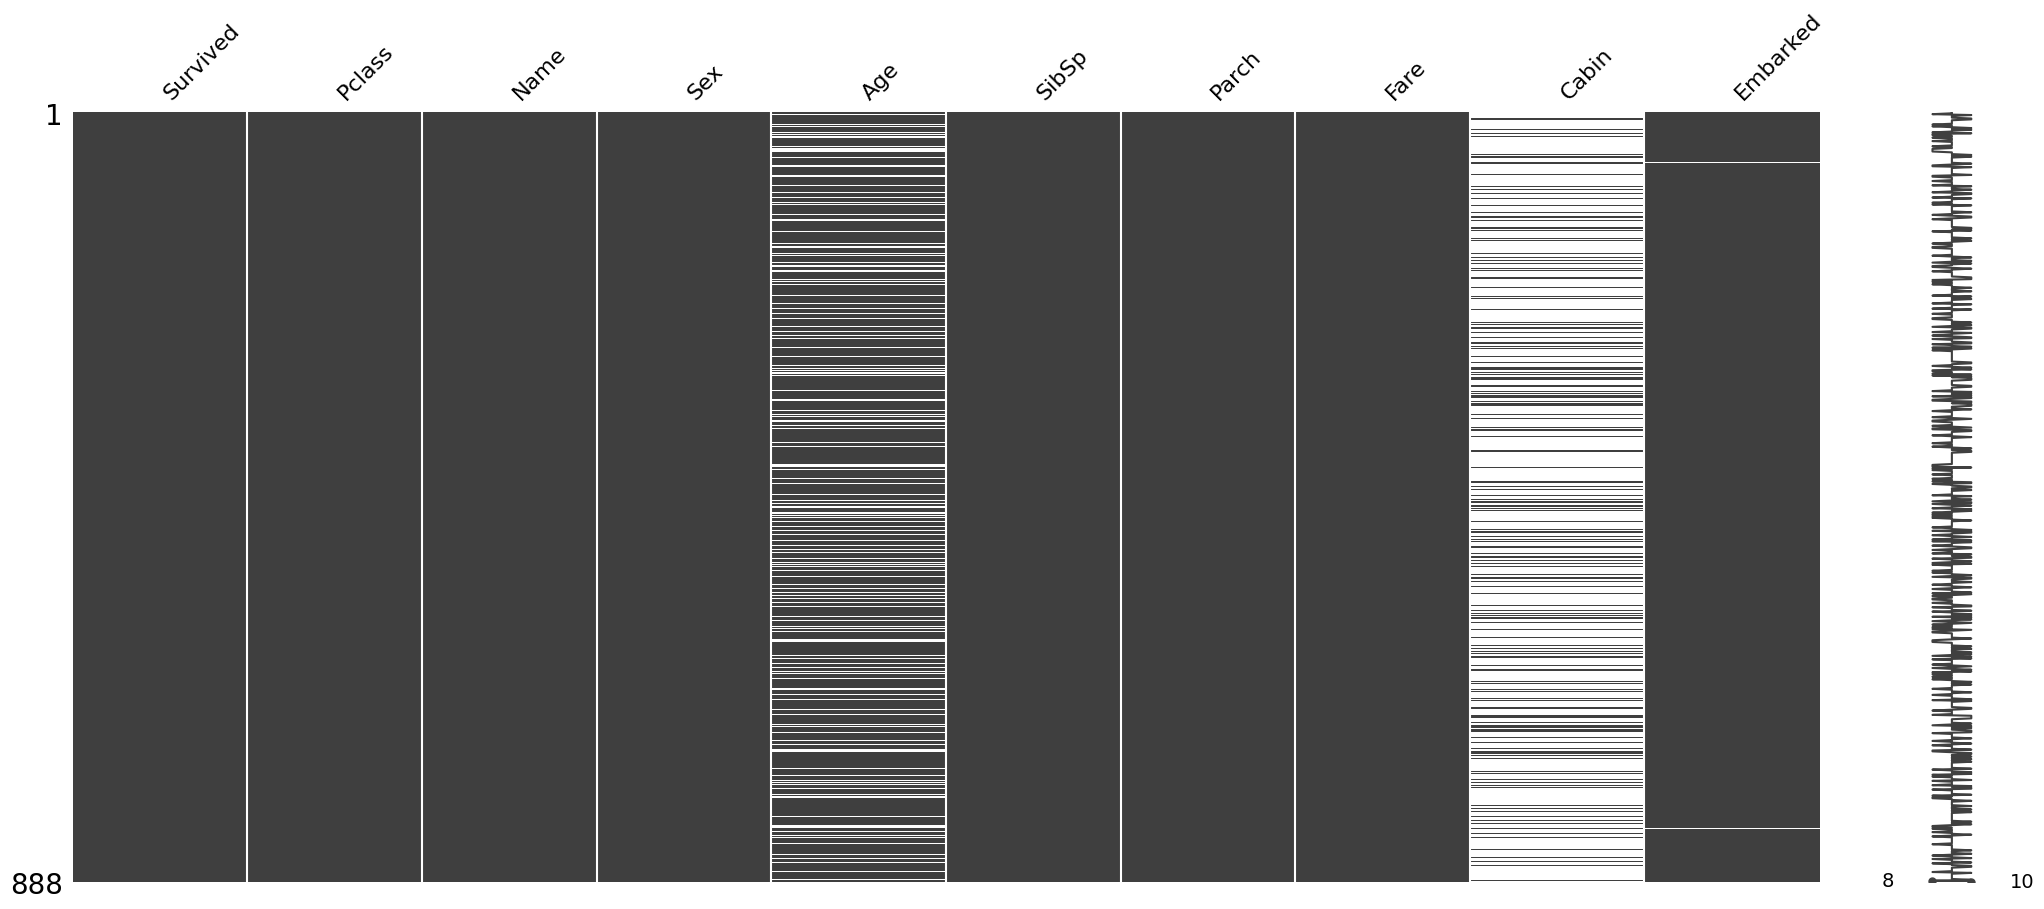

In [11]:
import missingno as msno
msno.matrix(df1)
plt.show()

In [12]:
df1[df1['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,saved,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B28,NaN
829,saved,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B28,NaN


In [13]:
sample_incomplete_rows=df1[df1.isnull().any(axis=1)]
display(sample_incomplete_rows.shape)
sample_incomplete_rows.sample(n=5)

(707, 10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
466,died,2,"Campbell, Mr. William",male,NaN,0,0,0.000,NaN,S
433,died,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,7.125,NaN,S
669,saved,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,52.000,C126,S
863,died,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.550,NaN,S
204,saved,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,8.050,NaN,S


In [14]:
df1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,888.000000,711.000000,888.000000,888.000000,888.000000
mean,2.310811,29.685190,0.522523,0.382883,32.164010
std,0.834850,14.551792,1.104235,0.807113,49.748455
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df1[df1['Survived']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'],cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Pclass,0.000000,nan,nan,nan,nan,nan,nan,nan
Age,0.000000,nan,nan,nan,nan,nan,nan,nan
SibSp,0.000000,nan,nan,nan,nan,nan,nan,nan
Parch,0.000000,nan,nan,nan,nan,nan,nan,nan
Fare,0.000000,nan,nan,nan,nan,nan,nan,nan


In [16]:
df1[['Age','Fare','Pclass']].agg(['sum','max','mean','std','skew','kurt'])

,Age,Fare,Pclass
sum,21106.170000,28561.641000,2052.000000
max,80.000000,512.329200,3.000000
mean,29.685190,32.164010,2.310811
std,14.551792,49.748455,0.834850
skew,0.391295,4.789552,-0.635215
kurt,0.170913,33.375730,-1.271626


In [17]:
df1['Embarked'].value_counts()

,count
Embarked,
S,642
C,167
Q,77


In [18]:
df1['Embarked'][df1['Sex']=='female'].value_counts(normalize=True)*100

,proportion
Embarked,
S,65.048544
C,23.300971
Q,11.650485


In [19]:
for col in df1[['Survived','Sex','Embarked']]:
  print(df1[col].value_counts())
  print('****'*7)

Survived
died     549
saved    339
Name: count, dtype: int64
****************************
Sex
male      577
female    311
Name: count, dtype: int64
****************************
Embarked
S    642
C    167
Q     77
Name: count, dtype: int64
****************************


In [20]:
df2=df1.sample(frac=1,random_state=3)
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
587,saved,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,79.2000,B41,C
94,died,3,"Coxon, Mr. Daniel",male,59.0,0,0,7.2500,NaN,S
160,died,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,16.1000,NaN,S
728,died,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,26.0000,NaN,S
692,saved,3,"Lam, Mr. Ali",male,NaN,0,0,56.4958,NaN,S


In [21]:
columns=['Age']
for col in columns:
  df1[col].replace(0, np.nan, inplace=True)
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
4,died,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,died,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,died,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,died,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S


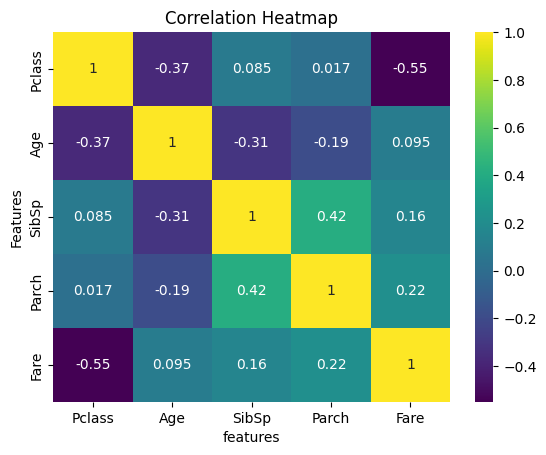

In [22]:
df2=df1.copy()

corr=df2.select_dtypes('number').corr()
sns.heatmap(corr,annot=True, cmap='viridis')
plt.xlabel('features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')
plt.show()

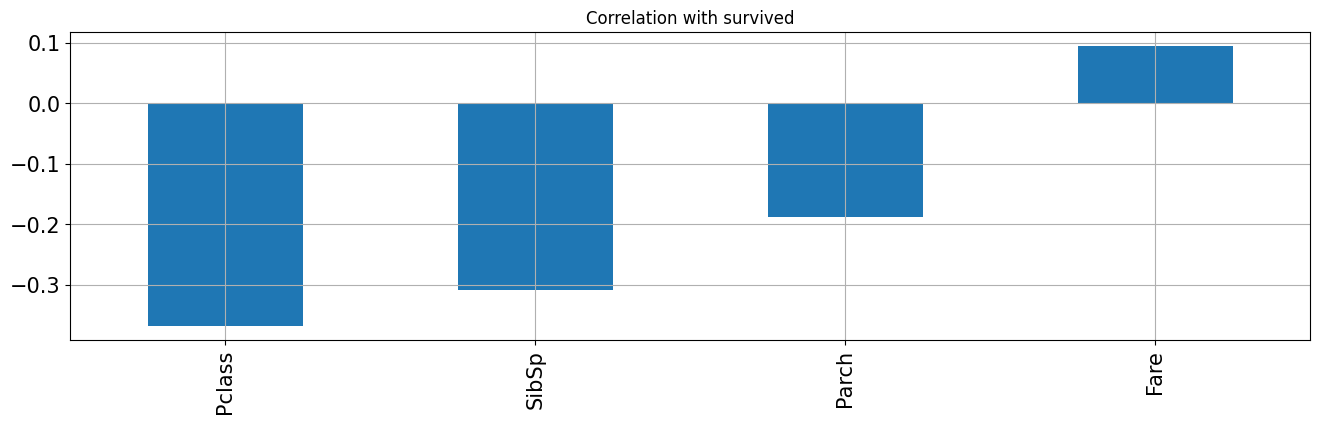

In [23]:
df2=df1.copy()
X=df2.select_dtypes('number').drop(["Age"],axis=1)
Y=df2.select_dtypes('number')['Age']
X.corrwith(Y).plot.bar(figsize=(16,4),title='Correlation with survived',fontsize=15,rot=90,grid=True)
plt.show()

In [24]:
df3=df1.copy()
df3=df3[df3['Cabin'].notna()]
print(df3.shape)
df3.head()

(202, 10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
6,died,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
10,saved,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G6,S
11,saved,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,C103,S
21,saved,2,"Beesley, Mr. Lawrence",male,34.0,0,0,13.0000,D56,S
23,saved,1,"Sloper, Mr. William Thompson",male,28.0,0,0,35.5000,A6,S


In [25]:
df3.fillna(method='ffill',inplace=True)
display(df3.shape)
df3.head()

(202, 10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
6,died,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
10,saved,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G6,S
11,saved,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,C103,S
21,saved,2,"Beesley, Mr. Lawrence",male,34.0,0,0,13.0000,D56,S
23,saved,1,"Sloper, Mr. William Thompson",male,28.0,0,0,35.5000,A6,S


In [26]:
df4=df1.copy()
df4['Age']=df4['Age'].fillna(df4['Age'].mean())
display(df4.head())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,died,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,7.2500,NaN,S
4,died,3,"Allen, Mr. William Henry",male,35.00000,0,0,8.0500,NaN,S
5,died,3,"Moran, Mr. James",male,29.68519,0,0,8.4583,NaN,Q
6,died,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,51.8625,E46,S
7,died,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,21.0750,NaN,S


In [27]:
df4['Age']=df4['Age'].fillna(0)
df4['Age']=df4['Age'].fillna('None')
df4['Age'].fillna(method='backfill',inplace=True)
df4['Embarked'].fillna(value='A',inplace=True)
df4['Pclass'].fillna(value=0,inplace=True)
df4.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,died,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,7.2500,NaN,S
4,died,3,"Allen, Mr. William Henry",male,35.00000,0,0,8.0500,NaN,S
5,died,3,"Moran, Mr. James",male,29.68519,0,0,8.4583,NaN,Q
6,died,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,51.8625,E46,S
7,died,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,21.0750,NaN,S


In [28]:
titanic_fare500=df4[df4['Fare']>500][['Name','Embarked','Fare']]
display(titanic_fare500.shape)
titanic_fare500

(3, 3)

,Name,Embarked,Fare
258,"Ward, Miss. Anna",C,512.3292
679,"Cardeza, Mr. Thomas Drake Martinez",C,512.3292
737,"Lesurer, Mr. Gustave J",C,512.3292


In [29]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
4,died,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,died,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,died,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,died,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S


In [30]:
df1[df1['Survived']=="died"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
4,died,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,died,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,died,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,died,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...
884,died,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,7.0500,NaN,S
885,died,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,NaN,Q
886,died,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
888,died,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S


In [31]:
titanic_age_selection=df1[(df1['Sex']=='male')&(df1['Age']>50.00)]
display(titanic_age_selection.shape)
titanic_age_selection.head()

(47, 10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
6,died,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
33,died,2,"Wheadon, Mr. Edward H",male,66.0,0,0,10.5000,NaN,S
54,died,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,61.9792,B30,C
94,died,3,"Coxon, Mr. Daniel",male,59.0,0,0,7.2500,NaN,S
96,died,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542,A5,C


In [32]:
# Convert "Survived" back to numerical for calculation
df1["Survived"].replace({"died": 0, "saved": 1}, inplace=True)

women=df1.loc[df1['Sex']=='female']['Survived']
rate_women=(women.sum()/len(women)).round(3)*100
print('Percentage of women who Survived:',rate_women,'%')

# Corrected typo in column name from "sex" to "Sex"
men=df1.loc[df1["Sex"]=='male']['Survived']
rate_men=(men.sum()/len(men)).round(3)*100
print('Percentage of men who Survived:',rate_men,'%')

Percentage of women who Survived: 74.0 %
Percentage of men who Survived: 18.9 %


In [33]:
titanic_Pclass=df1[df1['Pclass'].isin([1,2])]
display(titanic_Pclass.shape)
titanic_Pclass.head()

(398, 10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,C103,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,16.0000,NaN,S
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,NaN,S


In [34]:
cabin_no_na=df1[df1['Cabin'].notna()]
display(cabin_no_na.shape)
cabin_no_na.head()

(202, 10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G6,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,C103,S
21,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,13.0000,D56,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,35.5000,A6,S


In [35]:
titanic_Pclass=df1[(df1['Pclass']==1)&(df1['Sex']=='female')&(df1['Age']>50)]

display(titanic_Pclass.shape)
titanic_Pclass.head()

(13, 10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,C103,S
195,1,1,"Lurette, Miss. Elise",female,58.0,0,0,146.5208,B80,C
268,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,153.4625,C125,S
275,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,77.9583,D7,S
366,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,75.2500,D37,C


In [36]:
df1['Cabin_null']=np.where(df1['Cabin'].isnull(),0,1)
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_null
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S,0


In [37]:
#f1['Bucket']=np.where(df1['Fare']<250,'Low','High')
#df1.head()
df1['Bucket']=np.where(df1['Fare']>250,'Low','High')
df1.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_null,Bucket
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,NaN,S,0,High
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,B42,S,1,High
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,NaN,S,0,High
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C148,C,1,High
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,NaN,Q,0,High


In [38]:
#sorting value
df5=df1.copy()
titanic_age_missing_first=df5.sort_values(by='Age',ascending=False)
titanic_age_missing_first.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_null,Bucket
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0000,A23,S,1,High
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,7.7750,NaN,S,0,High
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542,A5,C,1,High
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,49.5042,NaN,C,0,High
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,7.7500,NaN,Q,0,High


In [39]:
#selecting numerical data
df6=df5.copy()
Numerical_data=df6.select_dtypes(include=['number'])
#display(Numerical_data.shape)
Numerical_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_null
0,0,3,22.0,1,0,7.2500,0
4,0,3,35.0,0,0,8.0500,0
5,0,3,NaN,0,0,8.4583,0
6,0,1,54.0,0,0,51.8625,1
7,0,3,2.0,3,1,21.0750,0


In [40]:
#categorical data type
df6=df1.copy()
categorical_data=df6.select_dtypes(include=['object'])
categorical_data.head()

,Name,Sex,Cabin,Embarked,Bucket
0,"Braund, Mr. Owen Harris",male,NaN,S,High
4,"Allen, Mr. William Henry",male,NaN,S,High
5,"Moran, Mr. James",male,NaN,Q,High
6,"McCarthy, Mr. Timothy J",male,E46,S,High
7,"Palsson, Master. Gosta Leonard",male,NaN,S,High


In [41]:
#group by
titanic_room=df6.groupby(['Embarked'])['Age'].mean().reset_index()
titanic_room.head()

,Embarked,Age
0,C,30.759070
1,Q,28.089286
2,S,29.441576


In [42]:
#groupby aggregate
df6.groupby('Embarked').agg({'Fare':np.mean,'Sex':np.size})

,Fare,Sex
Embarked,,
C,59.886305,167
Q,13.276030,77
S,27.069118,642


In [43]:
#groupby function min
#df6.groupby('Embarked')['Sex'].min().to_frame().reset_index()
df6.groupby('Embarked')['Sex'].min().reset_index()

,Embarked,Sex
0,C,female
1,Q,female
2,S,female


In [44]:
#groupby first
df6.groupby(['Age','SibSp'])['Fare'].first()

Age    SibSp
0.42   0         8.5167
0.67   1        14.5000
0.75   2        19.2583
0.83   0        29.0000
       1        18.7500
                 ...   
70.00  1        71.0000
70.50  0         7.7500
71.00  0        34.6542
74.00  0         7.7750
80.00  0        30.0000
Name: Fare, Length: 185, dtype: float64

In [45]:
#groupby value count
#df6.groupby('Survived')['Sex'].value_counts().to_frame()
df6.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    230
          male      109
Name: count, dtype: int64

In [46]:
#per groupby
#df6.groupby(['Survived','Sex'])['Pclass'].count()/df6.groupby(['Sex'])['Pclass'].count()*100
df6.groupby(['Survived','SibSp'])['Fare'].count()/df6.groupby(['SibSp'])['Fare'].count()*100

Survived  SibSp
0         0         65.568369
          1         46.859903
          2         53.571429
          3         75.000000
          4         83.333333
          5        100.000000
          8        100.000000
1         0         34.431631
          1         53.140097
          2         46.428571
          3         25.000000
          4         16.666667
Name: Fare, dtype: float64

In [47]:
#mean groupby
#df6.groupby('Sex')[['Age','Pclass']].mean()
df6.groupby('Sex')[['Age','Fare']].mean()

,Age,Fare
Sex,,
female,27.856589,44.483455
male,30.726645,25.523893


In [48]:
#sum groupby
#df6.groupby(['Sex','Embarked'])[['Fare','Age']].sum()
df6.groupby(["Sex",'Embarked'])[['Fare','Age']].sum()

Fare       Age
Sex    Embarked                     
female C         5416.1125   1691.00
       Q          454.8585    291.50
       S         7803.3835   5104.50
male   C         4584.9004   2276.92
       Q          567.3958    495.00
       S         9574.9903  11147.25

In [49]:
#groupby fun
#df6.groupby(['Embarked','Pclass']).agg({'Fare':[np.size,np.size]})
#df6.groupby(["Embarked",'Age']).agg({'Fare':[np.size,np.median]})
df6.groupby(['Embarked','Age']).agg({'Fare':[np.size,np.mean]})

Fare          
               size      mean
Embarked Age                 
C        0.42     1   8.51670
         0.75     2  19.25830
         1.00     2  26.37295
         3.00     1  41.57920
         4.00     1  13.41670
...             ...       ...
S        65.00    1  26.55000
         66.00    1  10.50000
         70.00    2  40.75000
         74.00    1   7.77500
         80.00    1  30.00000

[162 rows x 2 columns]

In [50]:
#count groupby
#df6.groupby(['Survived','Age','Embarked'])['Pclass'].count().to_frame()
df6.groupby(["Embarked",'Age','SibSp'])['Pclass'].count()

Embarked  Age    SibSp
C         0.42   0        1
          0.75   2        2
          1.00   0        2
          3.00   1        1
          4.00   0        1
                         ..
S         66.00  0        1
          70.00  0        1
                 1        1
          74.00  0        1
          80.00  0        1
Name: Pclass, Length: 265, dtype: int64

In [51]:
#groupby agg
#df6.groupby(['Embarked','Survived']).agg({'Fare':np.size,'Age':np.size})
df6.groupby(['Embarked','Survived']).agg({'Fare':np.size,'Age':np.mean})

Fare        Age
Embarked Survived                 
C        0           75  33.666667
         1           92  28.857949
Q        0           47  30.325000
         1           30  22.500000
S        0          427  30.203966
         1          215  28.089196

In [52]:
#count groupby .to_frame()is not compulsory
#df6.groupby(["Age","Survived","Fare"])['Sex'].count().to_frame()
df6.groupby(['Survived','Age'])['Sex'].count()

Survived  Age 
0         1.0     2
          2.0     7
          3.0     1
          4.0     3
          6.0     1
                 ..
1         58.0    3
          60.0    2
          62.0    2
          63.0    2
          80.0    1
Name: Sex, Length: 142, dtype: int64

In [53]:
#sum groupby
#df6.groupby(['Sex','Embarked','SibSp'])[['Fare','Age']].sum()
df6.groupby(['Embarked','SibSp','Sex'])[['Fare','Age','Pclass']].sum()

Fare      Age  Pclass
Embarked SibSp Sex                               
C        0     female  2867.9292   956.00      66
               male    3445.1418  1611.42     144
         1     female  1965.6584   689.50      48
               male    1118.0794   665.50      44
         2     female   582.5249    45.50      11
               male      21.6792     0.00       3
Q        0     female   255.4585   226.50      85
               male     259.2458   390.00      89
         1     female   176.1500    65.00      16
               male      78.4000    40.00      15
         2     female    23.2500     0.00       3
               male     113.2500    44.00       4
         4     male     116.5000    21.00      12
S        0     female  3452.9042  2814.50     224
               male    5172.1485  8663.83     817
         1     female  2970.3375  1939.00     144
               male    2793.7918  2034.42     161
         2     female   222.9792   153.00      16
               male     485.4208   323.00      29
         3     female   737.2001   132.00      28
               male     365.3417    35.00      13
         4     female   164.4125    50.00      18
               male     292.4875    56.00      24
         5     female    46.9000    16.00       3
               male     187.6000    35.00      12
         8     female   208.6500     0.00       9
               male     278.2000     0.00      12

In [54]:
#value count groupby
df6.groupby(['Sex','Age']).value_counts()

Sex     Age   Survived  Pclass  Name                                  SibSp  Parch  Fare      Cabin    Embarked  Cabin_null  Bucket
female  2.0   0         1       Allison, Miss. Helen Loraine          1      2      151.5500  C22 C26  S         1           High      1
                        3       Strom, Miss. Telma Matilda            0      1      10.4625   G6       S         1           High      1
        4.0   1         2       Becker, Miss. Marion Louise           2      1      39.0000   F4       S         1           High      1
                        3       Sandstrom, Miss. Marguerite Rut       1      1      16.7000   G6       S         1           High      1
        14.0  1         1       Carter, Miss. Lucile Polk             1      2      120.0000  B96 B98  S         1           High      1
                                                                                                                                      ..
male    65.0  0         1       Millet, Mr. Francis Davis             0      0      26.5500   E38      S         1           High      1
                                Ostby, Mr. Engelhart Cornelius        0      1      61.9792   B30      C         1           High      1
        70.0  0         1       Crosby, Capt. Edward Gifford          1      1      71.0000   B22      S         1           High      1
        71.0  0         1       Goldschmidt, Mr. George B             0      0      34.6542   A5       C         1           High      1
        80.0  1         1       Barkworth, Mr. Algernon Henry Wilson  0      0      30.0000   A23      S         1           High      1
Name: count, Length: 181, dtype: int64

In [55]:
#titanic_room=df1.groupby(['Embarked'])['Survived'].nunique().reset_index()
#titanic_room.head()
titanic_room=df1.groupby(['Embarked'])['Survived'].unique().reset_index()
titanic_room.head()

,Embarked,Survived
0,C,"[1, 0]"
1,Q,"[0, 1]"
2,S,"[0, 1]"


In [56]:
df6.groupby(['Survived','Sex','Embarked'])['Pclass'].count()

Survived  Sex     Embarked
0         female  C             9
                  Q             9
                  S            63
          male    C            66
                  Q            38
                  S           364
1         female  C            63
                  Q            27
                  S           138
          male    C            29
                  Q             3
                  S            77
Name: Pclass, dtype: int64

In [57]:
df6.groupby('Sex')['Embarked'].count().nlargest().reset_index()

,Sex,Embarked
0,male,577
1,female,309


In [58]:
df6.groupby(["Embarked",'Sex'])[['Fare','Pclass']].mean().reset_index()

,Embarked,Sex,Fare,Pclass
0,C,female,75.223785,1.736111
1,C,male,48.262109,2.010526
2,Q,female,12.634958,2.888889
3,Q,male,13.838922,2.926829
4,S,female,38.822803,2.199005
5,S,male,21.711996,2.421769


In [59]:
df6.groupby('Embarked')['Fare'].agg(['mean','count',sum]).sort_values('sum').tail()

,mean,count,sum
Embarked,,,
Q,13.276030,77,1022.2543
C,59.886305,167,10001.0129
S,27.069118,642,17378.3738


In [60]:
quality_pivot=df6.pivot_table(index='Pclass',values='Age',aggfunc=np.mean)
quality_pivot.head()

,Age
Pclass,
1,38.252283
2,29.877630
3,25.138192


In [61]:
quality_pivot=df6.pivot_table(index='Pclass',values='Age',aggfunc=np.median)
quality_pivot.head()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [62]:
pd.crosstab(df6['Sex'],df6['Embarked'])

Embarked,C,Q,S
Sex,,,
female,72,36,201
male,95,41,441


In [63]:
pd.crosstab(df6['Embarked'],df6['Sex'],margins=True)

Sex,female,male,All
Embarked,,,
C,72,95,167
Q,36,41,77
S,201,441,642
All,309,577,886


In [64]:
df6['sex titanic map']=df6['Sex'].map({'male':1,'Female':0})
df6.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_null,Bucket,sex titanic map
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0,High,1.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,High,1.0
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q,0,High,1.0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S,1,High,1.0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S,0,High,1.0


In [65]:
df6['Fare range']=np.where(df6['Fare']<200,'Low','High')
df6.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_null,Bucket,sex titanic map,Fare range
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0,High,1.0,Low
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,High,1.0,Low
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q,0,High,1.0,Low
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S,1,High,1.0,Low
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S,0,High,1.0,Low


In [66]:
df6['Age_bins']=pd.cut(df6['Age'],bins=[0,5,12,19,40,60,90],labels=['Toddler','Child','Teenage','Adult','Mid age','Old age'])
df6.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_null,Bucket,sex titanic map,Fare range,Age_bins
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0,High,1.0,Low,Adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,High,1.0,Low,Adult
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q,0,High,1.0,Low,NaN
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S,1,High,1.0,Low,Mid age
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S,0,High,1.0,Low,Toddler


In [67]:
highest_fare=df6.nlargest(5,'Fare',keep='all')
highest_fare.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_null,Bucket,sex titanic map,Fare range,Age_bins
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,NaN,C,0,Low,NaN,High,Adult
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B51 B53 B55,C,1,Low,1.0,High,Adult
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B101,C,1,Low,1.0,High,Adult
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0000,C23 C25 C27,S,1,Low,1.0,High,Teenage
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0000,C23 C25 C27,S,1,Low,NaN,High,Adult
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,263.0000,C23 C25 C27,S,1,Low,NaN,High,Adult
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,C23 C25 C27,S,1,Low,1.0,High,Old age
